## Plot the fluxes as a function of radius at different lags relative to TC genesis
## Radius is the distance from the center of the proto-vortex embedded in the composite AEW

- Step 1: Run extract_L2_data.ncl after assigning the center lat/lons of the composite system
- Step 2: Run this code



### This produces fig 4 in the paper: 
- Aiyyer and Schreck (2023): Surface wind speeds and Enthalpy Fluxes During Tropical Cyclone Formation From Easterly Waves: A CYGNSS view

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import statsmodels
#import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from scipy import stats

import math
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
#open the data set containing the flux data
# sandbox version of flux L2 V2
fileName = '/home/sagan/work/data/data100/data/nasa/cygnss/paper/old_v2/L2_flux_atl_all_ver2_017.nc'

# podaac version of flux L2 V2 [same as above- confirned by checking the results - A. Aiyyer Nov 30, 2022]
fileName = '/home/sagan/work/data/data100/data/nasa/cygnss/paper/L2_flux_atl_all_ver2.nc'

ds = xr.open_dataset(fileName)
print(ds)
# convert to a pandas data frame
heatFlux = ds.to_dataframe().droplevel('points')
heatFlux.reset_index(inplace=True)
heatFlux.dropna(inplace=True)

# drop days past 3
heatFlux=heatFlux.drop(heatFlux.query(" `LagDays`>3 ").index)

print(heatFlux)


<xarray.Dataset>
Dimensions:   (LagDays: 9, points: 328000)
Coordinates:
  * LagDays   (LagDays) float32 -4.0 -3.0 -2.0 -1.0 0.0 1.0 2.0 3.0 4.0
  * points    (points) float64 7.0 16.0 22.0 36.0 51.0 ... nan nan nan nan nan
Data variables:
    LHF       (LagDays, points) float32 ...
    distance  (LagDays, points) float32 ...
    iPoints   (LagDays) float64 ...
    SHF       (LagDays, points) float32 ...
    SHF_YSLF  (LagDays, points) float32 ...
    LHF_YSLF  (LagDays, points) float32 ...
         LagDays         LHF    distance   iPoints        SHF   SHF_YSLF  \
0           -4.0  129.723953  549.890442  153858.0  13.275605  54.380505   
1           -4.0  137.298019  552.566956  153858.0  14.329422  17.742672   
2           -4.0  134.287415  555.298401  153858.0  14.268578  30.831520   
3           -4.0  135.759064  558.079651  153858.0  14.660933  27.750795   
4           -4.0  136.452362  560.915710  153858.0  14.772144  19.108431   
...          ...         ...         ...       .

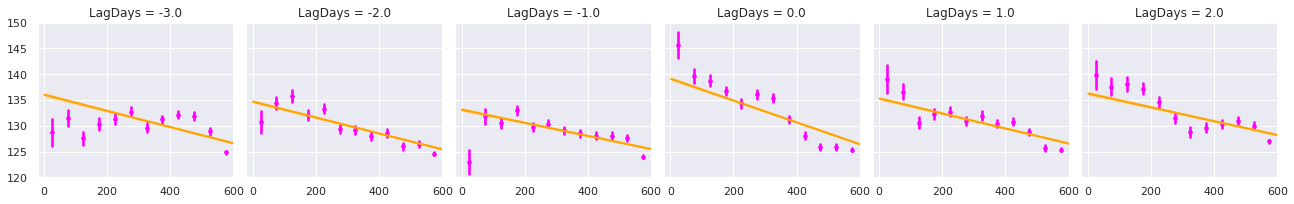

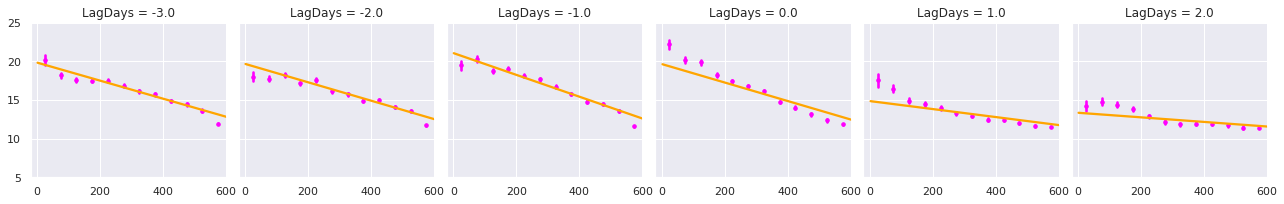

In [3]:
df=heatFlux[heatFlux["LagDays"].isin([-3,-2,-1,0,1,2])]

df_lhf = df[['LHF','distance','LagDays']]
df_lhf = df_lhf.reset_index(drop=True)
#df_lhf.rename(columns = {'LHF':'LHF'}, inplace = True)

df_shf = df[['SHF','distance','LagDays']]
df_shf = df_shf.reset_index(drop=True)
#df_shf.rename(columns = {'SHF':'SHF'}, inplace = True)

xbins = list(range(25,600,50))

g = sns.FacetGrid(df_lhf, col="LagDays")
ax = g.map_dataframe(sns.regplot, x="distance", y="LHF", marker = ".", scatter_kws={"color": "magenta"}, line_kws={"color": "orange"}, x_bins=xbins, lowess=False, x_ci=95)
g.set(ylim=(120, 150))
ax.set(xlim=(-20, 600))

g2 = sns.FacetGrid(df_shf, col="LagDays")
ax2 = g2.map_dataframe(sns.regplot, x="distance", y="SHF", marker = ".", scatter_kws={"color": "magenta"}, line_kws={"color": "orange"}, x_bins=xbins, lowess=False, x_ci=95)
g2.set(ylim=(5, 25))
ax2.set(xlim=(-20, 600))

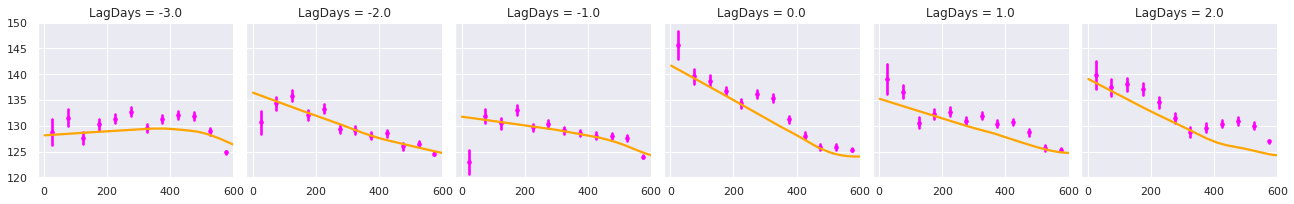

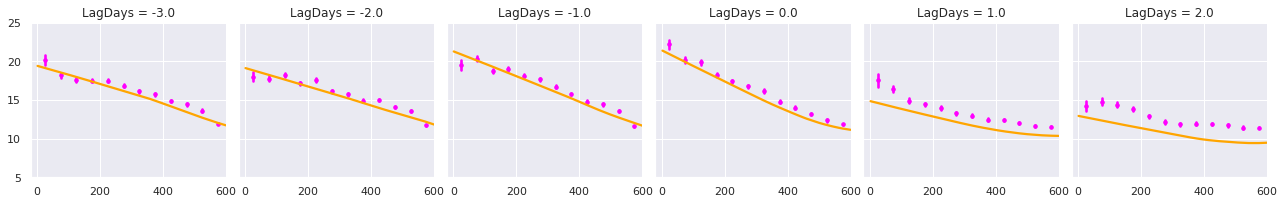

In [4]:

g = sns.FacetGrid(df_lhf, col="LagDays")
ax = g.map_dataframe(sns.regplot, x="distance", y="LHF", marker = ".", scatter_kws={"color": "magenta"}, line_kws={"color": "orange"}, x_bins=xbins, lowess=True, x_ci=95)
g.set(ylim=(120, 150))
ax.set(xlim=(-20, 600))

g2 = sns.FacetGrid(df_shf, col="LagDays")
ax2 = g2.map_dataframe(sns.regplot, x="distance", y="SHF", marker = ".", scatter_kws={"color": "magenta"}, line_kws={"color": "orange"}, x_bins=xbins, lowess=True, x_ci=95)
g2.set(ylim=(5, 25))
ax2.set(xlim=(-20, 600))

In [ ]:
# YSLF

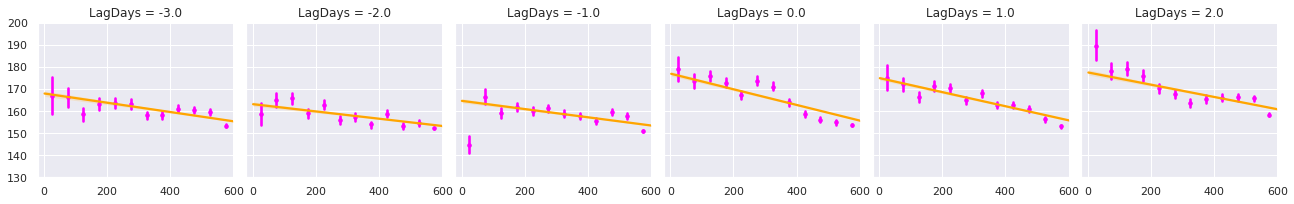

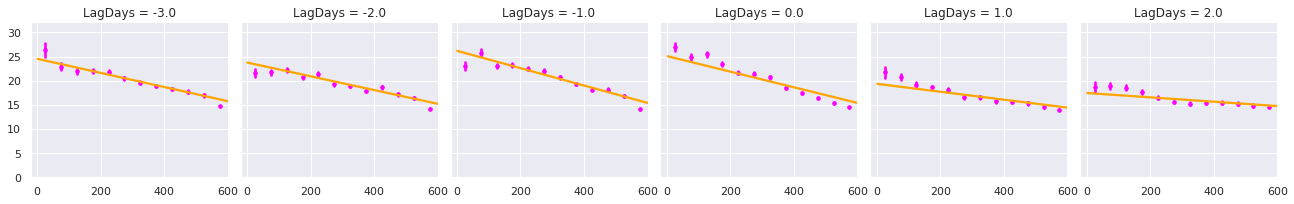

In [5]:
df_lhf = df[['LHF_YSLF','distance','LagDays']]
df_lhf = df_lhf.reset_index(drop=True)
df_lhf.rename(columns = {'LHF_YSLF':'LHF'}, inplace = True)

df_shf = df[['SHF_YSLF','distance','LagDays']]
df_shf = df_shf.reset_index(drop=True)
df_shf.rename(columns = {'SHF_YSLF':'SHF'}, inplace = True)

g = sns.FacetGrid(df_lhf, col="LagDays")
ax = g.map_dataframe(sns.regplot, x="distance", y="LHF", marker = ".", scatter_kws={"color": "magenta"}, line_kws={"color": "orange"}, x_bins=xbins, lowess=False, x_ci=95)
g.set(ylim=(130, 200))
ax.set(xlim=(-20, 600))


g2 = sns.FacetGrid(df_shf, col="LagDays")
ax = g2.map_dataframe(sns.regplot, x="distance", y="SHF", marker = ".", scatter_kws={"color": "magenta"}, line_kws={"color": "orange"}, x_bins=xbins, lowess=False, x_ci=95)
g2.set(ylim=(0, 32))
ax.set(xlim=(-20, 600))